<a href="https://colab.research.google.com/github/jthowinsson/time_series/blob/main/Modelo_som%2Bregresion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 6.5 MB/s eta 0:00:00


In [ ]:
pip install openpyxl

In [ ]:
 pip install dask

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset2.xlsx to dataset2.xlsx


In [ ]:
import pandas as pd

# Leer el archivo de Excel
data = pd.read_excel('dataset2.xlsx')


In [ ]:
import pandas as pd

# Leer todas las hojas de Excel y almacenarlas en un diccionario
dataset2 = pd.read_excel('dataset2.xlsx', sheet_name=None)

# Concatenar todas las hojas en un solo DataFrame
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Ver el DataFrame completo
print(df_completo)


        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07

In [ ]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo
# Concatenar los datasets en un único DataFrame (ajusta esta parte si df_completo ya está definido)
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Asegurar que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Filtrar valores negativos en la columna 'Quantity'
df_completo = df_completo[df_completo['Quantity'] >= 0]

# Ordenar los datos por fecha para una mejor visualización
df_completo = df_completo.sort_values(by='InvoiceDate')
# Contar valores negativos en la columna 'Quantity'
cantidad_negativos = (df_completo['Quantity'] < 0).sum()

print(f"Hay {cantidad_negativos} valores negativos en la columna 'Quantity'.")


El DataFrame tiene 1067371 filas y 8 columnas.
El DataFrame contiene un total de 8538968 datos (celdas).
Hay 0 valores negativos en la columna 'Quantity'.


In [ ]:
pip install ace_tools

In [ ]:
pip search ace_tools

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [ ]:
pip install git+https://github.com/usuario/ace_tools.git

  Cloning https://github.com/usuario/ace_tools.git to /tmp/pip-req-build-95fj9xgl
  Running command git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-95fj9xgl
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-95fj9xgl did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-95fj9xgl did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import pandas as pd
import numpy as np

# Calcular el rango intercuartil (IQR) para detectar valores atípicos en 'Quantity'
Q1 = df_completo['Quantity'].quantile(0.25)
Q3 = df_completo['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_completo[(df_completo['Quantity'] < lower_bound) | (df_completo['Quantity'] > upper_bound)]

# Filtrar los outliers que son menores a 60,000 o mayores a 60,000
filtered_outliers = outliers[(outliers['Quantity'] > 20000)]
filtered_outliers1 = outliers[(outliers['Quantity'] < -20000)]
print(filtered_outliers)
print(filtered_outliers1)
# Filtrar para eliminar valores mayores a 20000 y valores negativos
df_filtrado = df_completo[(df_completo['Quantity'] <= 20000) & (df_completo['Quantity'] >= 0)]

# Verificar el resultado
print(f"Filas originales: {df_completo.shape[0]}")
print(f"Filas después de filtrar: {df_filtrado.shape[0]}")
df_sinoutliers= df_filtrado
# Para ver las columnas de df_sinoutliers
print(df_sinoutliers.columns)
# Asegúrate de que 'DATE_TIME' esté en formato datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
# Asegúrate de que 'DATE_TIME' es una columna de tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')
import pandas as pd

# Asegúrate de que la columna 'DATE_TIME' sea del tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si la conversión fue exitosa
print(df_sinoutliers['DATE_TIME'].head())  # Mostrar las primeras filas de la columna 'DATE_TIME'

# Verificar si hay valores nulos después de la conversión
print(f'Cantidad de valores nulos en DATE_TIME: {df_sinoutliers["DATE_TIME"].isna().sum()}')

# Si es necesario, establecer 'DATE_TIME' como índice (si se va a usar como tal)
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Ahora la columna 'DATE_TIME' está convertida correctamente a tipo datetime y como índice
print(df_sinoutliers.index)  # Verificar que el índice es de tipo DatetimeIndex

        Invoice StockCode                     Description  Quantity  \
587080   541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
1065882  581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  Price  Customer ID         Country  
587080  2011-01-18 10:01:00   1.04      12346.0  United Kingdom  
1065882 2011-12-09 09:15:00   2.08      16446.0  United Kingdom  
Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []
Filas originales: 1044421
Filas después de filtrar: 1044419
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
Cantidad de valores nulos en DATE_TIME: 0
DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
       

<ipython-input-14-61bea737d70f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
<ipython-input-14-61bea737d70f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')
<ipython-input-14-61bea737d70f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
# Si 'DATE_TIME' es el índice, reseteamos el índice para convertirlo en una columna normal
df_sinoutliers.reset_index(inplace=True)

# Ahora 'DATE_TIME' es una columna normal, y puedes acceder a ella sin problemas
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si 'DATE_TIME' ahora está correctamente convertida
print(df_sinoutliers['DATE_TIME'].head())
# Si ya tienes el índice como 'DATE_TIME', no es necesario convertirlo a columna
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Verificar el tipo de índice (debe ser DatetimeIndex)
print(type(df_sinoutliers.index))  # Esto debe imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<ipython-input-15-7d68cb00d634>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')


EN ESTE PROCESO DEBEMOS REPARTIR NUESTROS DATOS en train test forcast Y TRABAJAR CON MIMAXESCALER

In [ ]:
train_size = int(len(df_sinoutliers) * 0.8)
train_data = df_sinoutliers.iloc[:train_size]
test_data = df_sinoutliers.iloc[train_size:]


In [ ]:
sample_data = df_sinoutliers.sample(frac=0.1, random_state=42)


In [ ]:
forecast_data = df_sinoutliers.tail(12)


In [ ]:
# Obtener los nombres de las columnas de 'df_sinoutliers'
column_names = df_sinoutliers.columns

# Imprimir los nombres de las columnas
print(column_names)
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'], errors='coerce')


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


<ipython-input-19-007495cdfda6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'], errors='coerce')


In [ ]:
df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
df_sinoutliers['Day'] = df_sinoutliers['InvoiceDate'].dt.day
df_sinoutliers['Hour'] = df_sinoutliers['InvoiceDate'].dt.hour
df_sinoutliers['Minute'] = df_sinoutliers['InvoiceDate'].dt.minute
df_sinoutliers['Second'] = df_sinoutliers['InvoiceDate'].dt.second


<ipython-input-20-b19bb3b17df4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
<ipython-input-20-b19bb3b17df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
<ipython-input-20-b19bb3b17df4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selección de las características (X) y la variable objetivo (y)
X = df_sinoutliers[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]  # Características extraídas de 'InvoiceDate'
y = df_sinoutliers['Quantity']  # Variable objetivo

# Normalización de las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inicializar el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 3. Aplicar el escalado solo en el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar el scaler y transformar los datos de entrenamiento

# 4. Aplicar el escalado en el conjunto de prueba usando el mismo scaler (sin recalcular)
X_test_scaled = scaler.transform(X_test)  # Solo transformar el conjunto de prueba con el scaler ajustado en el conjunto de entrenamiento

# Ahora puedes usar X_train_scaled y X_test_scaled para entrenar y probar tu modelo.


In [ ]:
X_train.reset_index(drop=True, inplace=True)


In [ ]:
X_train.head()

,Year,Month,Day,Hour,Minute,Second
0,2009,12,11,15,40,0
1,2011,5,10,10,0,0
2,2011,11,29,17,52,0
3,2011,10,3,9,44,0
4,2010,11,26,16,31,0


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=a7b9fd77784ffa6e7908db8e18a2382e6463924551dcd4f5f932b0e87ecdac6e
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


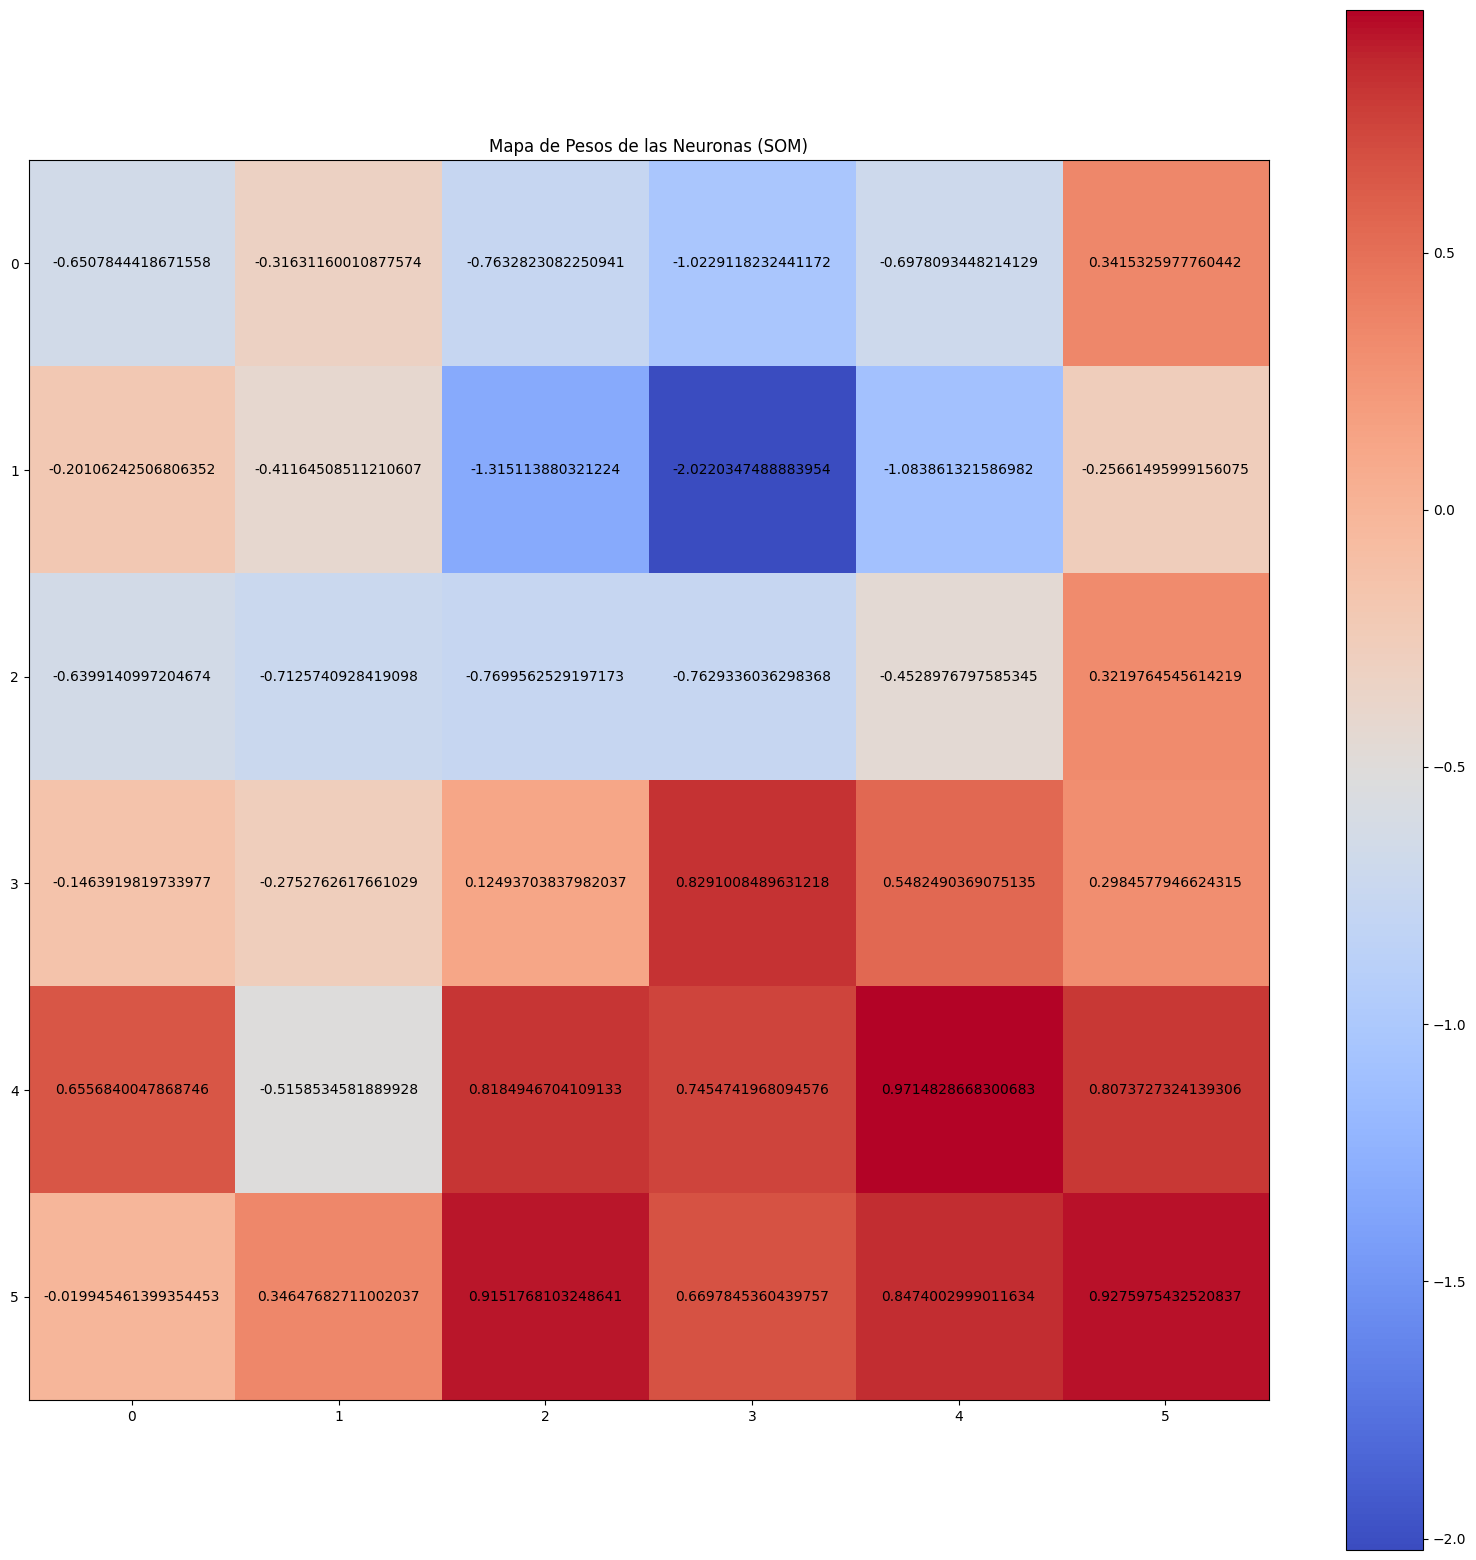

Evaluación SOM:
Precisión: 0.0278
Matriz de confusión:
[[   0    0    0 ...    0    0    0]
 [2024  414 4247 ...    0    0    0]
 [1096  221 2257 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


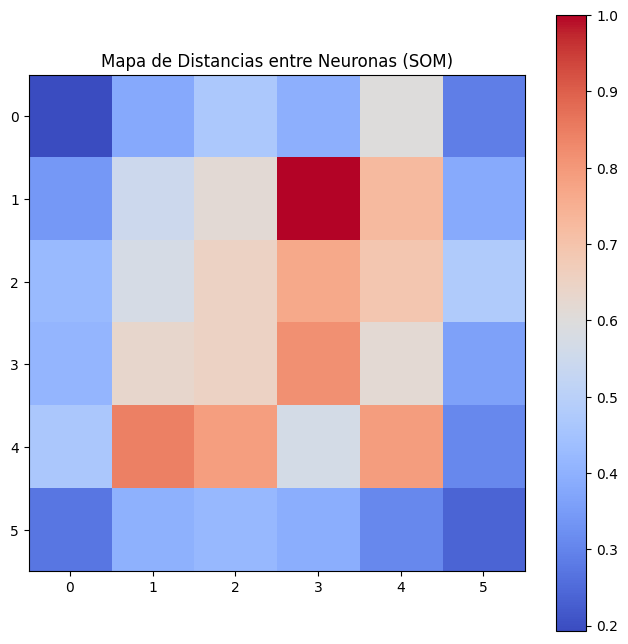

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Asegúrate de que X y y están definidos previamente
# X = tus datos de entrada
# y = etiquetas o valores correspondientes

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizamos las características

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SOM
som = MiniSom(x=6, y=6, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X_train, 100)  # Entrenamos el SOM

# Visualización de los pesos de las neuronas en el mapa SOM
plt.figure(figsize=(20, 20))
for i in range(som.get_weights().shape[0]):
    for j in range(som.get_weights().shape[1]):
        plt.text(j, i, str(som.get_weights()[i, j, 0]), color='black', ha='center', va='center')
plt.imshow(som.get_weights()[:, :, 0], cmap='coolwarm')  # Visualiza los pesos de la primera característica
plt.colorbar()
plt.title("Mapa de Pesos de las Neuronas (SOM)")
plt.show()

# Analizar la clasificación y los resultados
y_pred_som = np.zeros_like(y_test)

# Asignamos etiquetas a los clústeres (en este caso, mapeo de la unidad ganadora)
for i, x in enumerate(X_test):
    # Verificamos que `x` es un vector y no un solo valor
    win_pos = som.winner(x)  # Posición de la unidad ganadora (BMU)
    y_pred_som[i] = win_pos[0] * som.get_weights().shape[0] + win_pos[1]  # Asignamos un índice a la unidad ganadora

# Calcular la matriz de confusión y la precisión (requiere etiquetas definidas)
cm = confusion_matrix(y_test, y_pred_som)
accuracy = accuracy_score(y_test, y_pred_som)

print("Evaluación SOM:")
print(f"Precisión: {accuracy:.4f}")
print("Matriz de confusión:")
print(cm)

# Visualizar el mapa de distorsión del SOM
# Utilizamos `distance_map()` para mostrar la distancia entre las neuronas
distance_map = som.distance_map()  # Mapa de distancias entre neuronas
plt.figure(figsize=(8, 8))
plt.imshow(distance_map, cmap='coolwarm')  # Visualiza el mapa de distancias
plt.colorbar()
plt.title("Mapa de Distancias entre Neuronas (SOM)")
plt.show()

# Si se desea evaluar la calidad de la agrupación utilizando métricas adicionales,
# como la entropía o la cohesión entre los puntos, se pueden calcular también aquí.


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from minisom import MiniSom

# Asegúrate de que X y y están bien definidos (X: características, y: etiquetas)
# Si X tiene solo una columna, asegúrate de convertirlo en un array 2D con 6 características:
X = np.array(X).reshape(-1, 6)  # Si X tiene solo una columna o 6 características, aseguramos que sea 2D

# Entrenamiento y predicción con el SOM
som = MiniSom(x=6, y=6, input_len=6, sigma=1.0, learning_rate=0.5)
som.train_random(X, 100)  # Entrenamos el SOM con las características

# Inicializamos el array de predicciones (y_pred_som)
y_pred_som = np.zeros_like(y_test)

# Realizamos predicciones en los datos de prueba (X_test)
for i, x in enumerate(X_test):
    x = np.array(x).reshape(1, -1)  # Aseguramos que x sea un vector (2D)

    # Verificamos que las dimensiones coincidan con las del SOM
    weights = som.get_weights()  # Obtén las ponderaciones del SOM
    if x.shape[1] != weights.shape[2]:  # Compara las características de X_test con las del SOM
        print(f"Error: el número de características en X_test no coincide con el SOM ({weights.shape[2]} esperadas, {x.shape[1]} recibidas)")
        break

    win_pos = som.winner(x)  # Posición de la unidad ganadora (BMU)

    # Obtenemos el valor de activación de la unidad ganadora (BMU)
    y_pred_som[i] = som.activation_response(x).max()  # Usamos el valor máximo de activación

# Calcular MSE (Mean Squared Error)
mse_som = mean_squared_error(y_test, y_pred_som)

# Calcular RMSE (Root Mean Squared Error)
rmse_som = np.sqrt(mse_som)

# Calcular MAE (Mean Absolute Error)
mae_som = mean_absolute_error(y_test, y_pred_som)

# Calcular MAPE (Mean Absolute Percentage Error)
mape_som = np.mean(np.abs((y_test - y_pred_som) / y_test)) * 100  # MAPE en porcentaje

# Calcular los residuos (diferencia entre valores reales y predicciones)
residuos = y_test - y_pred_som

# Aplicar el Ljung-Box Test a los residuos (10 lags como ejemplo)
ljung_box_result = acorr_ljungbox(residuos, lags=10)  # Prueba de autocorrelación para 10 lags
p_value_ljung_box = ljung_box_result.iloc[-1, 1]  # P-value del último lag

# Mostrar los resultados
print(f"MSE (Mean Squared Error): {mse_som:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_som:.4f}")
print(f"MAE (Mean Absolute Error): {mae_som:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape_som:.4f}%")
print(f"P-value del Ljung-Box Test (autocorrelación en los residuos): {p_value_ljung_box:.4f}")


MSE (Mean Squared Error): 4660.7259
RMSE (Root Mean Squared Error): 68.2695
MAE (Mean Absolute Error): 9.9254
MAPE (Mean Absolute Percentage Error): 55.9738%
P-value del Ljung-Box Test (autocorrelación en los residuos): 0.9988


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from minisom import MiniSom
from statsmodels.stats.diagnostic import acorr_ljungbox

# Supongamos que X y y ya están definidos como tus datos de entrada y etiquetas respectivamente

# Entrenar el SOM
som = MiniSom(x=6, y=6, input_len=6, sigma=1.0, learning_rate=0.5)
som.train_random(X, 100)  # Entrenamos el SOM con las características

# Obtener las posiciones de las neuronas ganadoras para cada punto en el conjunto de entrenamiento
def get_bmu_coordinates(X):
    bmu_coordinates = []
    for x in X:
        win_pos = som.winner(x)  # Posición de la unidad ganadora (BMU)
        bmu_coordinates.append(win_pos)  # Guardamos la posición (i, j) de la unidad ganadora
    return np.array(bmu_coordinates)

# Obtener las coordenadas de las unidades ganadoras para el conjunto de entrenamiento y prueba
X_train_bmu = get_bmu_coordinates(X_train)
X_test_bmu = get_bmu_coordinates(X_test)

# Ahora, vamos a entrenar un modelo de regresión lineal usando las coordenadas (i, j) de las unidades ganadoras como características
regressor = LinearRegression()
regressor.fit(X_train_bmu, y_train)  # Entrenamos la regresión lineal

# Realizamos las predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test_bmu)

# Evaluación del modelo usando métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE en porcentaje

# Calcular los residuos (diferencia entre valores reales y predicciones)
residuos = y_test - y_pred

# Aplicar el Ljung-Box Test a los residuos (10 lags como ejemplo)
ljung_box_result = acorr_ljungbox(residuos, lags=10)  # Prueba de autocorrelación para 10 lags
p_value_ljung_box = ljung_box_result.iloc[-1, 1]  # P-value del último lag

# Mostrar los resultados
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}%")
print(f"P-value del Ljung-Box Test (autocorrelación en los residuos): {p_value_ljung_box:.4f}")


MSE (Mean Squared Error): 4561.6799
RMSE (Root Mean Squared Error): 67.5402
MAE (Mean Absolute Error): 11.8173
MAPE (Mean Absolute Percentage Error): 402.1736%
P-value del Ljung-Box Test (autocorrelación en los residuos): 0.9988


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from minisom import MiniSom
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que df_sinoutliers es el dataframe con las características y la variable objetivo
# df_sinoutliers = pd.read_csv('tu_archivo.csv')  # Cargar el dataframe si es necesario

# Selección de las características (X) y la variable objetivo (y)
X = df_sinoutliers[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]  # Características extraídas de 'InvoiceDate'
y = df_sinoutliers['Quantity']  # Variable objetivo

# Normalizar las características para los modelos (esto es importante para algunos modelos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# --- Modelo SOM ---
som = MiniSom(x=5, y=5, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5)
som.train(X_train, 100)  # Entrenamiento de 100 iteraciones

# Activación de los datos de prueba (encontrar las neuronas más cercanas para cada punto de entrada)
som_output = np.array([som.winner(x) for x in X_test])

# La predicción será el valor promedio de la neurona ganadora en el SOM
forecast_som = np.mean(som_output, axis=1)  # Predicciones SOM (simuladas)

# --- Modelo ARIMA ---
model_arima = ARIMA(y_train, order=(1,1,1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=len(y_test))

# --- Modelo Exponential Smoothing (ES) ---
model_es = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
model_es_fit = model_es.fit()
forecast_es = model_es_fit.forecast(steps=len(y_test))

# --- Modelo GARCH ---
model_garch = arch_model(y_train, vol='Garch', p=1, q=1)
model_garch_fit = model_garch.fit()
forecast_garch = model_garch_fit.forecast(horizon=len(y_test))
forecast_garch = forecast_garch.variance.values[-1, :]

# --- Modelo MLP ---
model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
model_mlp.fit(X_train, y_train)
forecast_mlp = model_mlp.predict(X_test)

# --- Modelo RNN ---
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=0)
forecast_rnn = model_rnn.predict(X_test_rnn)

# --- Modelo LSTM ---
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=0)
forecast_lstm = model_lstm.predict(X_test_rnn)

# --- Graficar los Resultados ---
plt.figure(figsize=(14, 7))

# Graficar la serie original (en el conjunto de prueba)
plt.plot(y_test.index, y_test, label='Test Original (extendido)', color='black', linestyle='-', marker='o')

# Graficar las predicciones de cada modelo
plt.plot(y_test.index, forecast_som, label='Test SOM', color='brown', linestyle=':')
plt.plot(y_test.index, forecast_arima, label='Test ARIMA', color='blue', linestyle='-.')
plt.plot(y_test.index, forecast_es, label='Test ES', color='red', linestyle='--')
plt.plot(y_test.index, forecast_garch, label='Test GARCH', color='green', linestyle='-')
plt.plot(y_test.index, forecast_mlp, label='Test MLP', color='orange', linestyle='-')
plt.plot(y_test.index, forecast_rnn, label='Test RNN', color='purple', linestyle='-')
plt.plot(y_test.index, forecast_lstm, label='Test LSTM', color='pink', linestyle='-')

# Añadir título y etiquetas
plt.title('Predicciones de Modelos de Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7716799762.583042
Iteration:      2,   Func. Count:     14,   Neg. LLF: 9006146.974668812
Iteration:      3,   Func. Count:     22,   Neg. LLF: 982472902.8211647
Iteration:      4,   Func. Count:     30,   Neg. LLF: 9004297.549357777
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2520474657.6172166
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5058357.22915426
Iteration:      7,   Func. Count:     52,   Neg. LLF: 4336876.031088762
Iteration:      8,   Func. Count:     58,   Neg. LLF: 5198248.741856425
Iteration:      9,   Func. Count:     65,   Neg. LLF: 4356969.969899214
Iteration:     10,   Func. Count:     72,   Neg. LLF: 4286373.406688747
Iteration:     11,   Func. Count:     78,   Neg. LLF: 4209842.5582068
Iteration:     12,   Func. Count:     83,   Neg. LLF: 4210221.253763167
Iteration:     13,   Func. Count:     89,   Neg. LLF: 4209693.588408733
Iteration:     14,   Func. Count:     94,   Neg. LLF: 4209666.8840

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
